Простой пример работы с dlib для генерации face landmarks на фото

In [1]:
import numpy as np
import cv2
import dlib
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("data/shape_predictor_68_face_landmarks.dat")

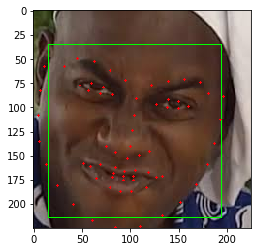

In [3]:
data = './data/boi3.jpg'

frame = cv2.imread(data)
faces = detector(frame)

for face in faces:
    x1 = face.left()
    y1 = face.top()
    x2 = face.right()
    y2 = face.bottom()
    cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 1)

    landmarks = predictor(frame, face)
    for n in range(0, 68):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        cv2.circle(frame, (x, y), 1, (9, 0, 255), -1)
            
            
img = frame[:,:,::-1]
plt.imshow(img)

Работа с аудио

In [5]:
import librosa

C:\Users\Sdernal\Anaconda3\envs\dlib\lib\site-packages\librosa\util\decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


In [24]:
data, sample_rate = librosa.load('data/lombargrid/audio/s2_l_bbim3a.wav')

In [39]:
data.shape

(61079,)

In [26]:
sample_rate

22050

In [27]:
len(data)

61079

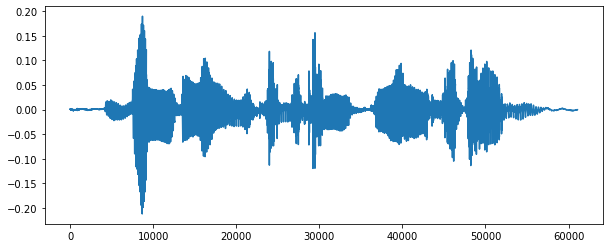

In [28]:
plt.figure(figsize=(10, 4))
plt.plot(data)
plt.show()

In [40]:
mfcc = librosa.feature.mfcc(y=data, sr=sample_rate,n_mfcc=40)

In [41]:
mfcc.shape

(40, 120)

In [42]:
mfccs = sklearn.preprocessing.scale(mfcc, axis=1)

C:\Users\Sdernal\Anaconda3\envs\dlib\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\Sdernal\Anaconda3\envs\dlib\lib\site-packages\sklearn\preprocessing\_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


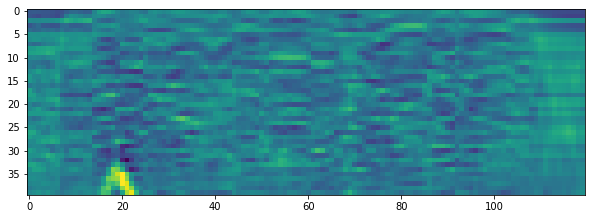

In [43]:
plt.figure(figsize=(10, 4))
plt.imshow(mfccs)
plt.show()

In [34]:
cap = cv2.VideoCapture('data/lombargrid/front/s2_l_bbim3a.mov')

In [35]:
frames = 0
while True:
    ret, frame = cap.read()    
    if not ret:
        break
    frames += 1

In [36]:
frames

68